# General analysis from association rules

## Run all year-by-year notebooks to generate association rules

### Run analysis for 2019

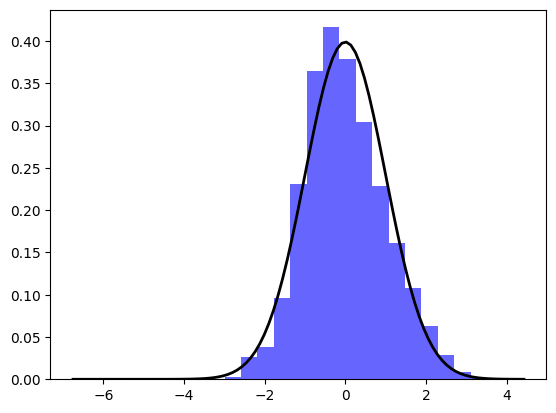

Time to run apriori: 0:34:14.617667
Count of association rules for support 15.0% and confidence 50.0%: 107041


In [1]:
%run 'analysis-2019.ipynb'

### Run analysis for 2020

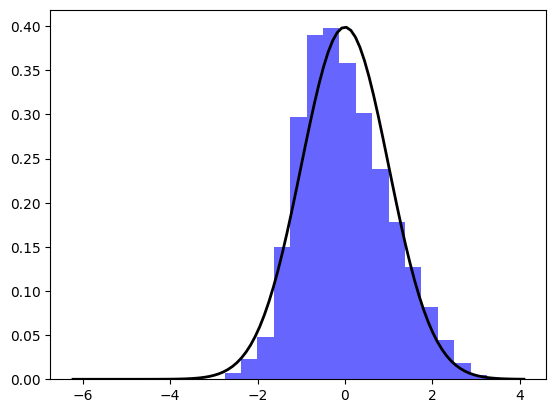

Time to run apriori: 0:44:15.407387
Count of association rules for support 15.0% and confidence 50.0%: 206379


In [2]:
%run 'analysis-2020.ipynb'

### Run analysis for 2021

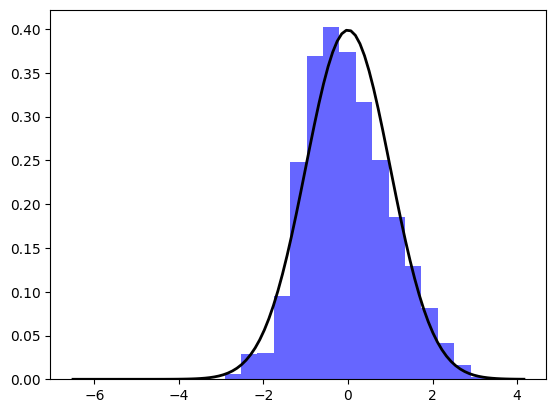

Time to run apriori: 0:29:14.370905
Count of association rules for support 15.0% and confidence 50.0%: 154745


In [3]:
%run 'analysis-2021.ipynb'

### Run analysis for 2022

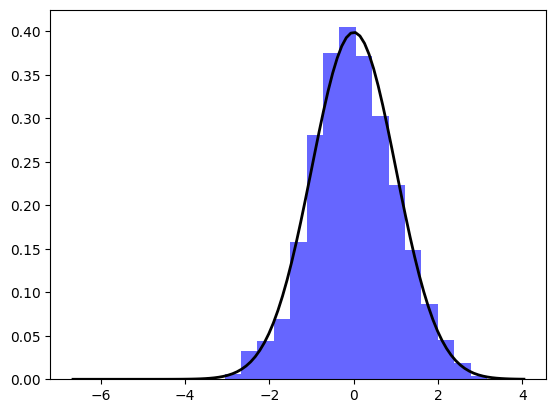

Time to run apriori: 0:16:36.275782
Count of association rules for support 15.0% and confidence 50.0%: 94269


In [4]:
%run 'analysis-2022.ipynb'

## Import all rules results

In [5]:
%run '../scripts/import-all-rules-results.py'

all_rules

,items_base,items_add,support,confidence,lift,year
0,[],['Dependencia administrativa nao informada'],0.713842,0.713842,1.000000,2019
1,[],['Entre 17 e 25 anos'],0.813179,0.813179,1.000000,2019
2,[],['Feminino'],0.537954,0.537954,1.000000,2019
3,[],['Já concluí o Ensino Médio'],0.528198,0.528198,1.000000,2019
4,[],['NOTA: MUITO ACIMA DA MÉDIA'],0.644401,0.644401,1.000000,2019
...,...,...,...,...,...,...
562429,"['Tem computador', 'Solteiro(a)', 'Não Respond...",['NOTA: MUITO ACIMA DA MÉDIA'],0.152226,0.921158,1.891887,2022
562430,"['Tem computador', 'Solteiro(a)', 'Não Respond...",['Já concluí o Ensino Médio'],0.152226,0.969382,2.060998,2022
562431,"['Tem computador', 'Solteiro(a)', 'Não Respond...",['Feminino'],0.152226,0.579182,1.023596,2022
562432,"['Tem computador', 'Solteiro(a)', 'Não Respond...",['Entre 17 e 25 anos'],0.152226,0.942393,1.114019,2022


## ECDF - Support x Association Rules Qty

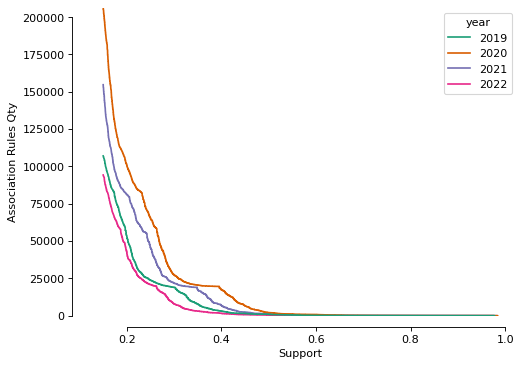

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", complementary=True, x="support", hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty

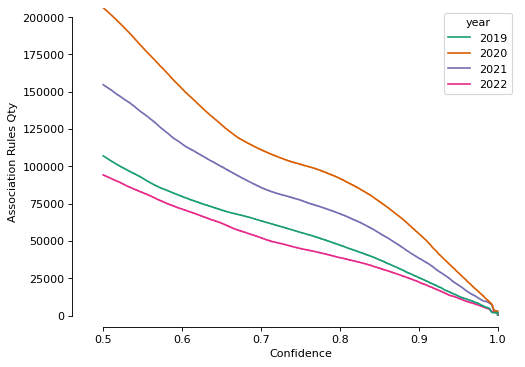

In [7]:
# charts
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confidence")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

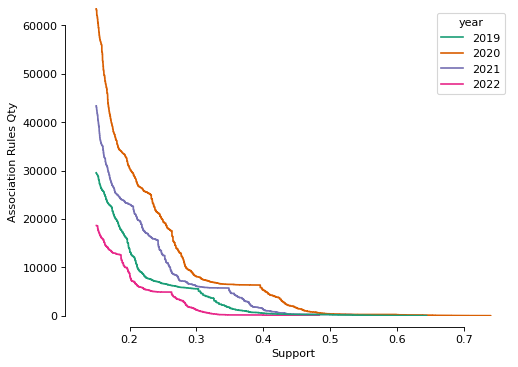

In [8]:
all_high_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="support", complementary=True,  hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

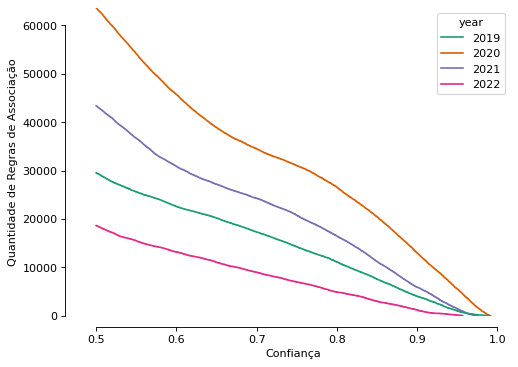

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

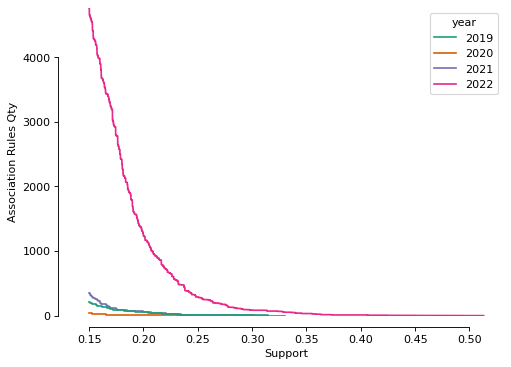

In [10]:
all_low_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="support", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

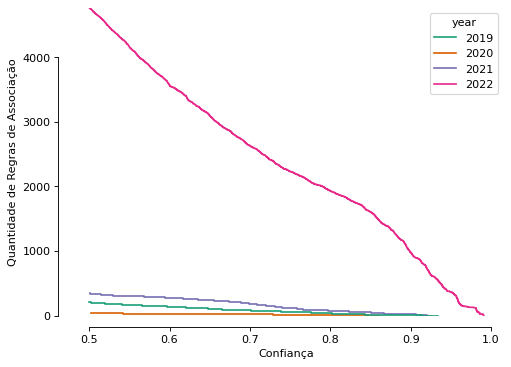

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## Filter by relevant rules (lift > 1.1)

In [12]:
relevant_rules_table_2019 = rules_table_2019.query("lift > 1.1")
relevant_rules_table_2020 = rules_table_2020.query("lift > 1.1")
relevant_rules_table_2021 = rules_table_2021.query("lift > 1.1")
relevant_rules_table_2022 = rules_table_2022.query("lift > 1.1")

print("2019: " + str(relevant_rules_table_2019['items_base'].count()))
print("2020: " + str(relevant_rules_table_2020['items_base'].count()))
print("2021: " + str(relevant_rules_table_2021['items_base'].count()))
print("2022: " + str(relevant_rules_table_2022['items_base'].count()))

2019: 91178
2020: 174886
2021: 130854
2022: 79885


## Recurring rules

In [13]:
intersec_19_20 = pd.merge(relevant_rules_table_2019, relevant_rules_table_2020, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_x', '_y'))
intersec_19_20_21 = pd.merge(intersec_19_20, relevant_rules_table_2021, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_z', '_w'))
intersec_all_years = pd.merge(intersec_19_20_21, relevant_rules_table_2022, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_a', '_b'))
intersec_all_years

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
0,['Branco'],['NOTA: MUITO ACIMA DA MÉDIA'],0.420352,0.851260,1.321009,2019,0.493427,0.903301,1.220094,2020,0.453407,0.838403,1.298055,2021,0.348986,0.739545,1.518887,2022
1,['NOTA: MUITO ACIMA DA MÉDIA'],['Branco'],0.420352,0.652314,1.321009,2019,0.493427,0.666475,1.220094,2020,0.453407,0.701985,1.298055,2021,0.348986,0.716752,1.518887,2022
2,['Região Sudeste'],['Branco'],0.258480,0.653939,1.324299,2019,0.282636,0.692703,1.268110,2020,0.258736,0.697684,1.290101,2021,0.209693,0.658933,1.396361,2022
3,['Branco'],['Tem computador'],0.427421,0.865575,1.243700,2019,0.489947,0.896930,1.185801,2020,0.479100,0.885913,1.218788,2021,0.383536,0.812761,1.357600,2022
4,['Tem computador'],['Branco'],0.427421,0.614139,1.243700,2019,0.489947,0.647742,1.185801,2020,0.479100,0.659118,1.218788,2021,0.383536,0.640641,1.357600,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57777,"['Tem computador', 'Solteiro(a)', 'NOTA: MUITO...",['Não Respondeu'],0.173893,1.000000,1.552426,2019,0.232433,1.000000,1.454513,2020,0.205563,1.000000,1.570452,2021,0.152226,1.000000,1.690941,2022
57778,"['Tem computador', 'Solteiro(a)', 'Não Respond...",['NOTA: MUITO ACIMA DA MÉDIA'],0.173893,0.952133,1.477547,2019,0.232433,0.976315,1.318714,2020,0.205563,0.959245,1.485147,2021,0.152226,0.921158,1.891887,2022
57779,"['Tem computador', 'Solteiro(a)', 'Não Respond...",['Já concluí o Ensino Médio'],0.173893,0.961780,1.820869,2019,0.232433,0.976700,1.602318,2020,0.205563,0.973751,1.822032,2021,0.152226,0.969382,2.060998,2022
57780,"['Tem computador', 'Solteiro(a)', 'Não Respond...",['Entre 17 e 25 anos'],0.173893,0.949143,1.167201,2019,0.232433,0.946668,1.127032,2020,0.205563,0.941045,1.117479,2021,0.152226,0.942393,1.114019,2022


## Save results to a new CSV file

In [14]:
import os
intersec_all_years.to_csv('results/intersection-all-years.csv')

## View data of interest

In [15]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
0,['Branco'],['NOTA: MUITO ACIMA DA MÉDIA'],0.420352,0.851260,1.321009,2019,0.493427,0.903301,1.220094,2020,0.453407,0.838403,1.298055,2021,0.348986,0.739545,1.518887,2022
5,['Classe Social C'],['NOTA: MUITO ACIMA DA MÉDIA'],0.219298,0.973313,1.510415,2019,0.226795,0.986603,1.332610,2020,0.215612,0.958359,1.483775,2021,0.158446,0.944125,1.939057,2022
23,['Mãe Pós-graduação completa'],['NOTA: MUITO ACIMA DA MÉDIA'],0.201946,0.954989,1.481979,2019,0.243557,0.967863,1.307298,2020,0.223420,0.921658,1.426954,2021,0.178811,0.885559,1.818772,2022
27,['Região Sudeste'],['NOTA: MUITO ACIMA DA MÉDIA'],0.323507,0.818455,1.270101,2019,0.360537,0.883630,1.193523,2020,0.304880,0.822112,1.272832,2021,0.225417,0.708344,1.454806,2022
29,['Tem computador'],['NOTA: MUITO ACIMA DA MÉDIA'],0.596552,0.857155,1.330157,2019,0.689187,0.911152,1.230697,2020,0.613787,0.844413,1.307359,2021,0.458656,0.766119,1.573466,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57753,"['Tem computador', 'Solteiro(a)', 'Não Respond...","['NOTA: MUITO ACIMA DA MÉDIA', 'Já concluí o E...",0.173893,0.897964,2.349590,2019,0.232433,0.944011,1.922646,2020,0.205563,0.908748,2.127642,2021,0.152226,0.857907,2.664681,2022
57757,"['Tem computador', 'Solteiro(a)', 'Não Respond...","['NOTA: MUITO ACIMA DA MÉDIA', 'Feminino']",0.173893,0.539646,1.597443,2019,0.232433,0.569294,1.423418,2020,0.205563,0.560734,1.609524,2021,0.152226,0.529629,2.069989,2022
57764,"['Tem computador', 'Solteiro(a)', 'Não Respond...","['Entre 17 e 25 anos', 'NOTA: MUITO ACIMA DA M...",0.173893,0.883702,1.562006,2019,0.232433,0.910905,1.365939,2020,0.205563,0.887332,1.533636,2021,0.152226,0.853343,1.942913,2022
57772,"['Tem computador', 'Solteiro(a)', 'Não Respond...","['NOTA: MUITO ACIMA DA MÉDIA', 'Dependencia ad...",0.173893,0.952133,1.994733,2019,0.232433,0.976315,1.804527,2020,0.205563,0.959245,2.035159,2021,0.152226,0.921158,2.585998,2022


In [16]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
7,['Classe Social E'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.330243,0.716345,2.014476,2019,0.242099,0.582680,2.244132,2020,0.313478,0.710366,2.006073,2021,0.469317,0.821316,1.600692,2022
26,['Não tem computador'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.256183,0.842617,2.369573,2019,0.192442,0.789964,3.042465,2020,0.241015,0.882451,2.492039,2021,0.373082,0.929626,1.811780,2022
139,"['Dependencia administrativa nao informada', '...",['NOTA: MUITO ABAIXO DA MÉDIA'],0.217493,0.679807,1.911724,2019,0.186334,0.563080,2.168645,2020,0.206769,0.658151,1.858616,2021,0.296311,0.774252,1.508967,2022
147,"['Entre 17 e 25 anos', 'Classe Social E']",['NOTA: MUITO ABAIXO DA MÉDIA'],0.230479,0.665412,1.871244,2019,0.161536,0.512227,1.972789,2020,0.235428,0.677109,1.912154,2021,0.374398,0.806022,1.570884,2022
154,"['Não Respondeu', 'Classe Social E']",['NOTA: MUITO ABAIXO DA MÉDIA'],0.192576,0.665238,1.870755,2019,0.150198,0.518493,1.996925,2020,0.152163,0.594480,1.678809,2021,0.218153,0.721493,1.406142,2022
157,['Não tem computador'],"['NOTA: MUITO ABAIXO DA MÉDIA', 'Classe Social...",0.249289,0.819940,2.482837,2019,0.187724,0.770599,3.182998,2020,0.231955,0.849278,2.709212,2021,0.362254,0.902644,1.923315,2022
159,"['Não tem computador', 'Classe Social E']",['NOTA: MUITO ABAIXO DA MÉDIA'],0.249289,0.914074,2.570522,2019,0.187724,0.860753,3.315101,2020,0.231955,0.925393,2.613307,2021,0.362254,0.956664,1.864475,2022
162,"['Solteiro(a)', 'Classe Social E']",['NOTA: MUITO ABAIXO DA MÉDIA'],0.283143,0.694151,1.952064,2019,0.204709,0.551795,2.125181,2020,0.277364,0.694516,1.961311,2021,0.423755,0.812786,1.584066,2022
164,['Classe Social E'],"['NOTA: MUITO ABAIXO DA MÉDIA', 'Tem celular']",0.314322,0.681809,2.009069,2019,0.231316,0.556728,2.238542,2020,0.301343,0.682868,1.999126,2021,0.450172,0.787812,1.597018,2022
166,"['Tem celular', 'Classe Social E']",['NOTA: MUITO ABAIXO DA MÉDIA'],0.314322,0.708923,1.993603,2019,0.231316,0.574260,2.211705,2020,0.301343,0.704260,1.988830,2021,0.450172,0.816986,1.592252,2022


## Generate WordCloud for NOTAS MUITO ACIMA DA MÉDIA

In [17]:
all_high = intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

xss = all_high['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words = ''.join(flat_list)

words = words.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "").replace("(", "").replace(")", "")

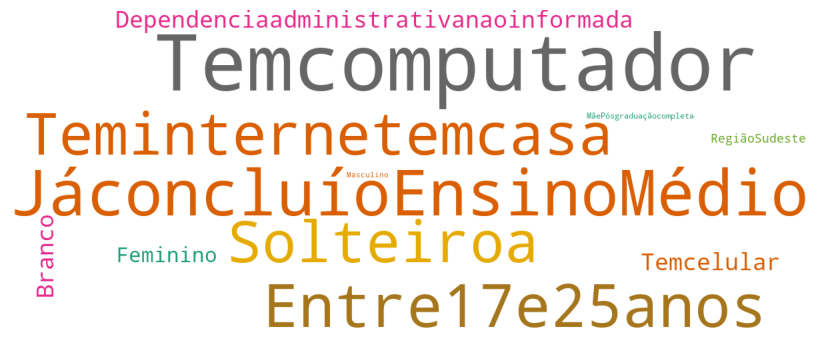

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words)
                 
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()

## Generate WordCloud for NOTAS MUITO ABAIXO DA MÉDIA

In [19]:
all_low = intersec_all_years.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

xss = all_low['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words2 = ''.join(flat_list)

words2 = words2.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "")

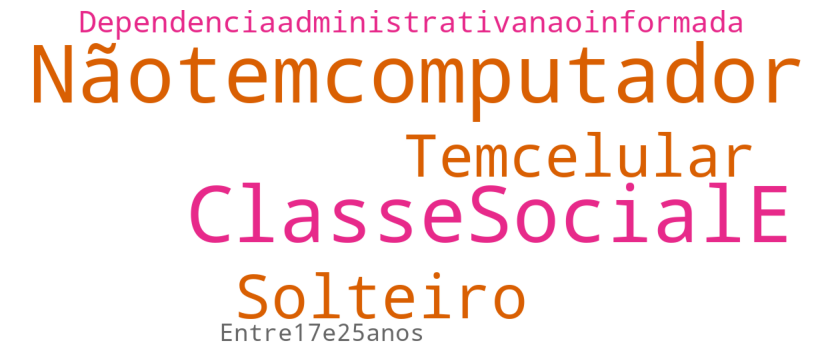

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words2)
                    
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()